<a href="https://colab.research.google.com/github/hphp777/GAN/blob/master/dcGAN/DCGAN_X_ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 클래스 1개의 데이터를 성별로 나누어서 데이터 증강하기

1. 각 이미지 폴더를 돌면서
2. 질병의 이름이 Fibrosis인것을 찾아
3. 성별에 따라서 폴더에 담는다.

In [ ]:
#@title 기본 제목 텍스트
!pip install --upgrade tensorflow

  Using cached tensorflow-2.6.0-cp37-cp37m-manylinux2010_x86_64.whl (458.3 MB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.0.1
    Uninstalling tensorflow-estimator-2.0.1:
      Successfully uninstalled tensorflow-estimator-2.0.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.0.2
    Uninstalling tensorboard-2.0.2:
      Successfully uninstalled tensorboard-2.0.2
  Attempting uninstall: gast
    Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.0.0
    Uninstalling tensorflow-2.0.0:
      Successfully uninstalled tensorflow-2.0.0


In [ ]:
pip install --upgrade tensorflow-gpu

  Using cached tensorflow_gpu-2.6.0-cp37-cp37m-manylinux2010_x86_64.whl (458.3 MB)
  Attempting uninstall: tensorflow-gpu
    Found existing installation: tensorflow-gpu 2.0.0rc1
    Uninstalling tensorflow-gpu-2.0.0rc1:
      Successfully uninstalled tensorflow-gpu-2.0.0rc1


In [ ]:
!pip install tensorflow==2.0
import tensorflow.compat.v2 as tf

  Using cached tensorflow-2.0.0-cp37-cp37m-manylinux2010_x86_64.whl (86.3 MB)
  Using cached gast-0.2.2-py3-none-any.whl
  Using cached tensorflow_estimator-2.0.1-py2.py3-none-any.whl (449 kB)
  Using cached tensorboard-2.0.2-py3-none-any.whl (3.8 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0
ERROR: pip's dependency resolver does not currently take

In [ ]:
pip install keras

In [ ]:
!pip install tensorflow-gpu==2.0.0-rc1

In [ ]:
#@title import
# 필요한 라이브러리 전부 임포트
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.models import load_model
from keras.preprocessing.image import * 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import random
import io
import tensorflow as tf
from tensorflow import optimizers
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.layers as L
import shutil

ImportError: ignored

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.0.0-rc1'

In [ ]:
# GIF를 만들기위해 설치합니다.
!pip install imageio

In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
all_xray_df = pd.read_csv('/content/drive/MyDrive/GraduationProject/Data_Entry_2017.csv')
train_df = pd.read_csv('/content/drive/MyDrive/GraduationProject/train_df.csv')

In [ ]:
all_xray_df.head()

,Unnamed: 0,Unnamed: 0.1,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
0,0,0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN,/content/drive/MyDrive/GraduationProject/image...
1,1,1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN,/content/drive/MyDrive/GraduationProject/image...
2,2,2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN,/content/drive/MyDrive/GraduationProject/image...
3,3,3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN,/content/drive/MyDrive/GraduationProject/image...
4,4,4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN,/content/drive/MyDrive/GraduationProject/image...


In [ ]:
print(all_xray_df.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Image Index', 'Finding Labels',
       'Follow-up #', 'Patient ID', 'Patient Age', 'Patient Gender',
       'View Position', 'OriginalImage[Width', 'Height]',
       'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11', 'path'],
      dtype='object')


# 특정 조건을 만족하는 데이터 필터링하기
데이터 분석을 하다보면 특정한 조건을 만족하는 행을 필터링해야하는 경우가 많이 있습니다. 예를 들어 특정 값을 초과하는 모든 행을 선택해서 새로운 데이터셋으로 만들고 싶을 수 있습니다. 또는 특정 단어나 숫자가 포함되어 있는 행만 필요할 수도 있습니다. 그러므로 이번에는 판다스를 사용해서 특정 조건을 만족하는 행을 필터링하는 방법을 알아보겠습니다.

 

특정 조건을 만족하는 행을 필터링하는 방법은 크게 세 가지 단계를 거칩니다.

 

  1. 컬럼을 선택합니다.

  2. 컬럼의 데이터와 특정 조건을 비교합니다. 조건을 만족하는 경우에는 True, 아닌 경우에는 False 반환합니다.

  3. 비교 결과를 이용해서 데이터프레임에서 일부 데이터를 추출합니다.

In [ ]:
diseases =  {
 'Atelectasis':1, 'Cardiomegaly':2, 'Consolidation':3, 'Edema':4, 'Effusion':5, 'Emphysema':6, 'Fibrosis':7, 'Hernia':8, 'Infiltration':9, 'Mass':10, 'Nodule':11, 'Pleural_Thickening':12, 'Pneumonia':13, 'Pneumothorax':14   
}

In [ ]:
# continent 컬럼을 선택합니다.
# 컬럼의 값과 조건을 비교합니다.
# 그 결과를 새로운 변수에 할당합니다.
disease = all_xray_df['Finding Labels'] == 'Fibrosis'

# lifeExp 컬럼을 선택합니다.
# 컬럼의 값과 조건을 비교합니다.
# 그 결과를 새로운 변수에 할당합니다.
female = all_xray_df['Patient Gender'] == 'F'
male = all_xray_df['Patient Gender'] == 'M'

# 두가지 조건를 동시에 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다. (AND)
augF = all_xray_df[disease & female]
augM = all_xray_df[disease & male]


In [ ]:
augF.head()

,Unnamed: 0,Unnamed: 0.1,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
295,295,295,00000067_000.png,Fibrosis,0,67,62,F,PA,2992,2991,0.143,0.143,NaN,/content/drive/MyDrive/GraduationProject/image...
373,373,373,00000092_002.png,Fibrosis,2,92,57,F,PA,2674,2991,0.143,0.143,NaN,/content/drive/MyDrive/GraduationProject/image...
374,374,374,00000092_003.png,Fibrosis,3,92,58,F,PA,2992,2991,0.143,0.143,NaN,/content/drive/MyDrive/GraduationProject/image...
698,698,698,00000181_001.png,Fibrosis,1,181,47,F,PA,2500,2048,0.171,0.171,NaN,/content/drive/MyDrive/GraduationProject/image...
749,749,749,00000181_052.png,Fibrosis,52,181,50,F,PA,2992,2991,0.143,0.143,NaN,/content/drive/MyDrive/GraduationProject/image...


In [ ]:
augM.head()

,Unnamed: 0,Unnamed: 0.1,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
99,99,99,00000022_001.png,Fibrosis,1,22,49,M,PA,2500,2048,0.168,0.168,NaN,/content/drive/MyDrive/GraduationProject/image...
105,105,105,00000024_000.png,Fibrosis,0,24,52,M,PA,2048,2500,0.168,0.168,NaN,/content/drive/MyDrive/GraduationProject/image...
632,632,632,00000159_000.png,Fibrosis,0,159,51,M,PA,2992,2991,0.143,0.143,NaN,/content/drive/MyDrive/GraduationProject/image...
831,831,831,00000204_000.png,Fibrosis,0,204,37,M,PA,2674,2878,0.143,0.143,NaN,/content/drive/MyDrive/GraduationProject/image...
835,835,835,00000204_004.png,Fibrosis,4,204,33,M,PA,2500,2048,0.168,0.168,NaN,/content/drive/MyDrive/GraduationProject/image...


# Dataset Load

각 질병별 데이터셋을 준비한다

In [ ]:
from PIL import Image

In [ ]:
augF.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Image Index', 'Finding Labels',
       'Follow-up #', 'Patient ID', 'Patient Age', 'Patient Gender',
       'View Position', 'OriginalImage[Width', 'Height]',
       'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11', 'path'],
      dtype='object')

In [ ]:
train_images = np.zeros((1,1024,1024), dtype=int)
train_labels = np.array([])
# path column을 돌면서 해당 이미지를 열어서 배열에 넣어주기
cnt = 0
for _, row in augF.iterrows():
  if cnt < 5 :
    cnt += 1  
    path = row['path']
    print(cnt)
    image = np.array(Image.open(path)) # 이미지를 넘파이 배열로 변환
    if len(image.shape) == 2: # 2차원인 이미지의 경우에만
      image = np.reshape(image, ((1,) + image.shape)) # 이미지의 차원을 2차원에서 3차원으로 변환
      train_images = np.append(train_images, image, axis=0) # 이미지를 train배열에 추가하기
      train_labels =  np.append(diseases['Fibrosis'], train_labels)

1
2
3
4
5


In [ ]:
train_images.shape[0]

6

In [ ]:
train_images = train_images.reshape(train_images.shape[0], 1024, 1024, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 # 이미지를 [-1, 1]로 정규화합니다.

In [ ]:
BUFFER_SIZE = 60000
BATCH_SIZE = 16

In [ ]:
# 데이터 배치를 만들고 섞습니다.
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

## 모델 만들기 
생성자와 감별자는 [케라스 Sequential API](https://www.tensorflow.org/guide/keras#sequential_model)를 이용해 정의됩니다. 

### 생성자

생성자는 시드값 (seed; 랜덤한 잡음)으로부터 이미지를 생성하기 위해, `tf.keras.layers.Conv2DTranspose` (업샘플링) 층을 이용합니다. 처음 `Dense`층은 이 시드값을 인풋으로 받습니다. 그 다음 원하는 사이즈 28x28x1의 이미지가 나오도록 업샘플링을 여러번 합니다. tanh를 사용하는 마지막 층을 제외한 나머지 각 층마다 활성함수로 `tf.keras.layers.LeakyReLU`을 사용하고 있음을 주목합시다.

In [ ]:
### upsampling 진행하기

def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(4*4*1024, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((4, 4, 1024)))
    assert model.output_shape == (None, 4, 4, 1024) # 주목: 배치사이즈로 None이 주어집니다.

    model.add(layers.Conv2DTranspose(512, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 8, 8, 512)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(256, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 16, 16, 256)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 32, 32, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 64, 64, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 128, 128, 32)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(16, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 256, 256, 16)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(8, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 512, 512, 8)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(4, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 1024, 1024, 4)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 1024, 1024, 1)

    return model

(아직 훈련이 되지않은) 생성자를 이용해 이미지를 생성해봅시다. 

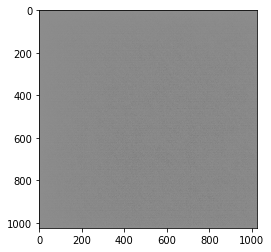

In [ ]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

### 감별자 
감별자는 합성곱 신경망(Convolutional Neural Network, CNN) 기반의 이미지 분류기입니다. 

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[1024, 1024, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

(아직까지 훈련이 되지 않은) 감별자를 사용하여, 생성된 이미지가 진짜인지 가짜인지 판별합니다. 모델은 진짜 이미지에는 양수의 값 (positive values)을, 가짜 이미지에는 음수의 값 (negative values)을 출력하도록 훈련되어집니다.

In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-1.1625756e-05]], shape=(1, 1), dtype=float32)


## 손실함수와 옵티마이저 정의
두 모델의 손실함수와 옵티마이저를 정의합니다. 

In [ ]:
# 이 메서드는 크로스 엔트로피 손실함수 (cross entropy loss)를 계산하기 위해 헬퍼 (helper) 함수를 반환합니다.
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

### 감별자 손실함수

이 메서드는 감별자가 가짜 이미지에서 얼마나 진짜 이미지를 잘 판별하는지 수치화합니다. 진짜 이미지에 대한 감별자의 예측과 1로 이루어진 행렬을 비교하고, 가짜 (생성된) 이미지에 대한 감별자의 예측과 0으로 이루어진 행렬을 비교합니다.

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

### 생성자 손실함수

생성자의 손실함수는 감별자를 얼마나 잘 속였는지에 대해 수치화를 합니다. 직관적으로 생성자가 원활히 수행되고 있다면, 감별자는 가짜 이미지를 진짜 (또는 1)로 분류를 할 것입니다. 여기서 우리는 생성된 이미지에 대한 감별자의 결정을 1로 이루어진 행렬과 비교를 할 것입니다. 

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

감별자와 생성자는 따로 훈련되기 때문에, 감별자와 생성자의 옵티마이저는 다릅니다.

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

### 체크포인트 저장
이 노트북은 오랫동안 진행되는 훈련이 방해되는 경우에 유용하게 쓰일 수 있는 모델의 저장방법과 복구방법을 보여줍니다. 

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

## 훈련 루프 정의하기

In [ ]:
EPOCHS = 5
noise_dim = 100
num_examples_to_generate = 16

# 이 시드를 시간이 지나도 재활용하겠습니다. 
# (GIF 애니메이션에서 진전 내용을 시각화하는데 쉽기 때문입니다.) 
seed = tf.random.normal([num_examples_to_generate, noise_dim])

훈련 루프는 생성자가 입력으로 랜덤시드를 받는 것으로부터 시작됩니다. 그 시드값을 사용하여 이미지를 생성합니다. 감별자를 사용하여 (훈련 세트에서 갖고온) 진짜 이미지와 (생성자가 생성해낸) 가짜이미지를 분류합니다. 각 모델의 손실을 계산하고, 그래디언트 (gradients)를 사용해 생성자와 감별자를 업데이트합니다.

In [ ]:
# `tf.function`이 어떻게 사용되는지 주목해 주세요.
# 이 데코레이터는 함수를 "컴파일"합니다.
@tf.function
def train_step(images):
    print("train_step")
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    print(epoch)
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # GIF를 위한 이미지를 바로 생성합니다.
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # 15 에포크가 지날 때마다 모델을 저장합니다.
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)
    
    # print (' 에포크 {} 에서 걸린 시간은 {} 초 입니다'.format(epoch +1, time.time()-start))
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # 마지막 에포크가 끝난 후 생성합니다.
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

**이미지 생성 및 저장**


In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # `training`이 False로 맞춰진 것을 주목하세요.
  # 이렇게 하면 (배치정규화를 포함하여) 모든 층들이 추론 모드로 실행됩니다. 
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

## 모델 훈련
위에 정의된 `train()` 메서드를 생성자와 감별자를 동시에 훈련하기 위해 호출합니다. 생성적 적대 신경망을 학습하는 것은 매우 까다로울 수 있습니다. 생성자와 감별자가 서로를 제압하지 않는 것이 중요합니다. (예를 들어 학습률이 비슷하면 한쪽이 우세해집니다.)
훈련 초반부에는 생성된 이미지는 랜덤한 노이즈처럼 보입니다. 훈련이 진행될수록, 생성된 숫자는 점차 진짜처럼 보일 것입니다. 약 50 에포크가 지난 후, MNIST 숫자와 닮은 이미지가 생성됩니다. 코랩에서 기본 설정으로 실행하면, 에포크마다 1분정도 소요될 것입니다.

In [ ]:
%%time
train(train_dataset, EPOCHS)

0


마지막 체크포인트를 복구합니다.

In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

## GIF 생성

In [ ]:
# 에포크 숫자를 사용하여 하나의 이미지를 보여줍니다.
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

In [ ]:
display_image(EPOCHS)

`imageio`로 훈련 중에 저장된 이미지를 사용해 GIF 애니메이션을 만듭니다.

In [ ]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  last = -1
  for i,filename in enumerate(filenames):
    frame = 2*(i**0.5)
    if round(frame) > round(last):
      last = frame
    else:
      continue
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

import IPython
if IPython.version_info > (6,2,0,''):
  display.Image(filename=anim_file)

코랩에서 작업하고 있다면, 아래의 코드에서 애니메이션을 다운로드 받을 수 있습니다: 

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(anim_file)